<a href="https://colab.research.google.com/github/harrisbarton/PyTorch-for-Deep-Learning-and-Computer-Vision-Course-All-Codes-/blob/master/Copy_of_Titanic_ML_AAD_Subteam2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Subteam 2 Titanic ML Automated Algorithm Design

In [16]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [17]:
#navigate to folder
%cd 'drive/MyDrive/Titanic Folder Personal'

/content/drive/MyDrive/Titanic Folder Personal


In [18]:
import pandas as pd
import numpy as np

In [19]:
#read in data
train = pd.read_csv("train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
train.shape

(891, 12)

In [21]:
train["Name"]

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
                             ...                        
886                                Montvila, Rev. Juozas
887                         Graham, Miss. Margaret Edith
888             Johnston, Miss. Catherine Helen "Carrie"
889                                Behr, Mr. Karl Howell
890                                  Dooley, Mr. Patrick
Name: Name, Length: 891, dtype: object

In [22]:
#read in test data
test = pd.read_csv("test.csv")
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [23]:
#extract title from person's name since it may correlate to the passenger class
#We give credit to the creator of: https://www.kaggle.com/vinothan/titanic-model-with-90-accuracy 
#MLA Citation: Vinothan. “Titanic Model with 90% Accuracy.” Kaggle, Kaggle, 8 Aug. 2018, www.kaggle.com/vinothan/titanic-model-with-90-accuracy. 
#Papers for Inspiration: 
#1. Ekinci, Ekin, et al. “A Comparative Study on Machine Learning: Techniques Using Titanic Dataset.” Research Gate, ICAT, 28 Apr. 2018, www.researchgate.net/profile/Neytullah_Acun/publication/324909545_A_Comparative_Study_on_Machine_Learning_Techniques_Using_Titanic_Dataset/links/5b199ad40f7e9b68b428acf4/A-Comparative-Study-on-Machine-Learning-Techniques-Using-Titanic-Dataset.pdf. 
#2. Singh, Ramandeep. “Analyzing Titanic Disaster Using Machine Learning Algorithm.” IJSRET, International Journal of Scientific Research and Engineering Trends, 2020, ijsret.com/wp-content/uploads/2020/07/IJSRET_V6_issue3_481.pdf. 
import re
def extract_title(name):
  title = re.search("([A-Za-z]+)\.", name)
  return title[0] 

In [24]:
#impute the age with median based on title
def build_dict(df):
  titleDict = {}
  for titles in df["Title"].unique():
    titleDict[titles] = df[df["Title"] == titles]["Age"].median()
  return titleDict

def lookup_age(title, dictName):
  return dictName[title]


In [25]:
# general preprocess function
def preprocess_data(df):
  df.drop(["Cabin", "Embarked"], axis=1, inplace=True)
  df["Title"] = df["Name"].apply(lambda x: extract_title(x))
  df = finish_preprocess(df)
  return df
def finish_preprocess(df):
  ageDict = build_dict(df)
  df["Imputed Age"] = df["Title"].apply(lambda x: ageDict[x])
  df["Age"] = df["Age"].fillna(df["Imputed Age"])
  df = df.set_index("PassengerId")
  df.drop(["Imputed Age", "Title", "Ticket", "Name"], axis=1, inplace=True)
  df = pd.get_dummies(df, columns=["Sex"])
  return df

In [26]:
train_df = preprocess_data(train)
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1
2,1,1,38.0,1,0,71.2833,1,0
3,1,3,26.0,0,0,7.9250,1,0
4,1,1,35.0,1,0,53.1000,1,0
5,0,3,35.0,0,0,8.0500,0,1


While it seems that people with the title "Miss" and people with specialized titles seem to have a higher survival rate, we worry about the possibility of overfitting if we do attempt to prioritize the ones with specialized titles in a model. What we might want to do is impute the ages based on the title.

In [27]:
train_df.isnull().sum()

Survived      0
Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
dtype: int64

In [28]:
#preprocess the test data using the general preprocess function
test_df = preprocess_data(test)
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,0,1
893,3,47.0,1,0,7.0000,1,0
894,2,62.0,0,0,9.6875,0,1
895,3,27.0,0,0,8.6625,0,1
896,3,22.0,1,1,12.2875,1,0


In [29]:
test_df.shape

(418, 7)

In [30]:
test_df.isnull().sum()


Pclass        0
Age           1
SibSp         0
Parch         0
Fare          1
Sex_female    0
Sex_male      0
dtype: int64

In [31]:
#impute the 1 missing fare entry using the median fare for a given class
def build_dict_fare(df):
  fareDict = {}
  for pclass in df["Pclass"].unique():
    fareDict[pclass] = df[df["Pclass"] == pclass]["Fare"].median()
  return fareDict

def lookup_age(title, dictName):
  return dictName[title]

fareDict = build_dict_fare(test_df)
test_df["Imputed Fare"] = test_df["Pclass"].apply(lambda x: fareDict[x])
test_df["Fare"] = test_df["Fare"].fillna(test_df["Imputed Fare"])

test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Imputed Fare
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,7.8958
893,3,47.0,1,0,7.0000,1,0,7.8958
894,2,62.0,0,0,9.6875,0,1,15.7500
895,3,27.0,0,0,8.6625,0,1,7.8958
896,3,22.0,1,1,12.2875,1,0,7.8958


In [32]:
test_df.isnull().sum()

Pclass          0
Age             1
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Imputed Fare    0
dtype: int64

In [33]:
#In the test set, we have only one missing age. Just replace it with the median for simplicity (not too big of a deal)
test_df["Age"] = test_df["Age"].fillna(test_df["Age"].median())
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Imputed Fare
PassengerId,,,,,,,,
892,3,34.5,0,0,7.8292,0,1,7.8958
893,3,47.0,1,0,7.0000,1,0,7.8958
894,2,62.0,0,0,9.6875,0,1,15.7500
895,3,27.0,0,0,8.6625,0,1,7.8958
896,3,22.0,1,1,12.2875,1,0,7.8958


In [34]:
test_df.isnull().sum()

Pclass          0
Age             0
SibSp           0
Parch           0
Fare            0
Sex_female      0
Sex_male        0
Imputed Fare    0
dtype: int64

In [35]:
test_df.drop(["Imputed Fare"], axis=1, inplace=True)
test_df.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
892,3,34.5,0,0,7.8292,0,1
893,3,47.0,1,0,7.0000,1,0
894,2,62.0,0,0,9.6875,0,1
895,3,27.0,0,0,8.6625,0,1
896,3,22.0,1,1,12.2875,1,0


In [36]:
train_df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,,
1,0,3,22.0,1,0,7.2500,0,1
2,1,1,38.0,1,0,71.2833,1,0
3,1,3,26.0,0,0,7.9250,1,0
4,1,1,35.0,1,0,53.1000,1,0
5,0,3,35.0,0,0,8.0500,0,1


In [37]:
#Train test split
from sklearn.model_selection import train_test_split

#X = features
#y = survived

y = train_df["Survived"]
X = train_df.drop(["Survived"], axis=1)

y

PassengerId
1      0
2      1
3      1
4      1
5      0
      ..
887    0
888    1
889    0
890    1
891    0
Name: Survived, Length: 891, dtype: int64

In [38]:
X

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
1,3,22.0,1,0,7.2500,0,1
2,1,38.0,1,0,71.2833,1,0
3,3,26.0,0,0,7.9250,1,0
4,1,35.0,1,0,53.1000,1,0
5,3,35.0,0,0,8.0500,0,1
...,...,...,...,...,...,...,...
887,2,27.0,0,0,13.0000,0,1
888,1,19.0,0,0,30.0000,1,0
889,3,21.0,1,2,23.4500,1,0


In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

#(X_train, y_train) are going to be the training set
#(X_test, y_test) are going to be the testing set

X_train

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
58,3,28.5,0,0,7.2292,0,1
718,2,27.0,0,0,10.5000,1,0
432,3,35.0,1,0,16.1000,1,0
634,1,30.0,0,0,0.0000,0,1
164,3,17.0,0,0,8.6625,0,1
...,...,...,...,...,...,...,...
370,1,24.0,0,0,69.3000,1,0
321,3,22.0,0,0,7.2500,0,1
528,1,30.0,0,0,221.7792,0,1


In [40]:
X_test

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
PassengerId,,,,,,,
591,3,35.0,0,0,7.1250,0,1
132,3,20.0,0,0,7.0500,0,1
629,3,26.0,0,0,7.8958,0,1
196,1,58.0,0,0,146.5208,1,0
231,1,35.0,1,0,83.4750,1,0
...,...,...,...,...,...,...,...
457,1,65.0,0,0,26.5500,0,1
192,2,19.0,0,0,13.0000,0,1
604,3,44.0,0,0,8.0500,0,1


In [41]:
y_train

PassengerId
58     0
718    1
432    1
634    0
164    0
      ..
370    1
321    0
528    0
126    1
266    0
Name: Survived, Length: 712, dtype: int64

In [42]:
y_test

PassengerId
591    0
132    0
629    0
196    1
231    1
      ..
457    0
192    0
604    0
95     0
767    0
Name: Survived, Length: 179, dtype: int64

In [43]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Title          0
Imputed Age    0
dtype: int64

In [44]:
import xgboost as xgb
from sklearn.metrics import confusion_matrix
def xgboost_with_fnr_fpr(X_train, y_train, X_test, y_test):
  gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
  y_pred = gbm.predict(X_test)
  tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
  print("True Negatives", tn)
  print("False Positives", fp)
  print("False Negatives", fn)
  print("True Positives", tp)
  fpr = (fp/(fp + tp))
  fnr = (fn/(fn + tn))
  return fnr, fpr

print(xgboost_with_fnr_fpr(X_train, y_train, X_test, y_test))

True Negatives 103
False Positives 14
False Negatives 15
True Positives 47
(0.1271186440677966, 0.22950819672131148)


Text(0, 0.5, 'fnr')

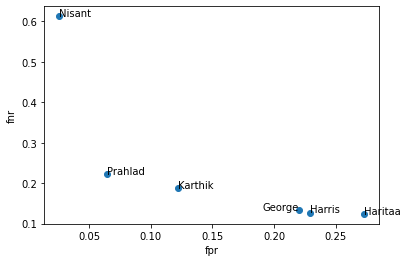

In [45]:
import matplotlib.pyplot as plt 
#fpr_fnr_Nisant = (0.02564102564102564, 0.6129032258064516)
#fpr_fnr_Harris = (0.22950819672131148 0.1271186440677966)
#fpr_fnr_Karthik = (0.12195121951219512, 0.18840579710144928)
#fpr_fnr_George = (0.22033898305084745, 0.13333333333333333)

list_of_fpr_fnr = [(0.02564102564102564, 0.6129032258064516), (0.22950819672131148, 0.1271186440677966), (0.12195121951219512, 0.18840579710144928),(0.22033898305084745, 0.13333333333333333)
, (0.27272727272727, 0.12389380530973451), (0.06451612903225806, 0.22297297297297297)]

plt.scatter(*zip(*list_of_fpr_fnr))
plt.text(0.02564102564102564, 0.6129032258064516, 'Nisant')
plt.text(0.22950819672131148, 0.1271186440677966, 'Harris')
plt.text(0.12195121951219512, 0.18840579710144928, "Karthik")
plt.text(0.22033898305084745, 0.13333333333333333, "George", horizontalalignment = 'right')
plt.text(0.27272727272727, 0.12389380530973451, "Haritaa")
plt.text(0.06451612903225806, 0.22297297297297297, "Prahlad")
plt.xlabel("fpr")
plt.ylabel("fnr")